In [61]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt
from numpy import linalg as LA
from scipy.stats import unitary_group
import random
from scipy.integrate import quad
from scipy.integrate import dblquad
# import concurrent.futures
import multiprocessing
import os
from scipy import stats

from mpl_toolkits import mplot3d
import scipy.integrate as spi

In [62]:
M =1
mu = 0
rho_q = 1
rho_a = 1
#theta= x+1j*y

In [63]:
def Matrix(na,nq): #new model
    H_mat = np.zeros((na*M,M), complex)
    G_mat = np.zeros((nq*M,M), complex)
    for i in range(0,na*M,M):
        if M>1:
            H_mat[i:M+i,:] = math.sqrt(rho_a)*unitary_group.rvs(M)
        else:
            x1 = random.random()
            y1 = math.sqrt(1 - pow(x1, 2))
            H_mat[i:M + i, :] = math.sqrt(rho_a)*(x1+1j*y1)
    for i in range(0,nq*M,M):
        if M > 1:
            G_mat[i:M+i,:] = math.sqrt(rho_q)*unitary_group.rvs(M)
        else:
            x2 = random.random()
            y2 = np.sqrt(1 - np.power(x2, 2))
            G_mat[i:M + i, :] = math.sqrt(rho_a)*(x2 + 1j * y2)
    return H_mat, G_mat

In [67]:
def inner(x,y,sigma2,matrix,s,h,thresh_real=0,thresh_im=0):
    G = matrix[1]
    return pow(norm.cdf((math.sqrt(2)/sigma2)*((G*(x+1j*y+h)).real-thresh_real))*norm.cdf((math.sqrt(2)/sigma2)*((G*(x+1j*y+h)).imag-thresh_im)),s)*\
    pow(norm.cdf((math.sqrt(2)/sigma2)*((G*(x+1j*y)).real-thresh_real))*norm.cdf((math.sqrt(2)/sigma2)*((G*(x+1j*y)).imag-thresh_im)),1-s)+\
    pow(norm.cdf(-(math.sqrt(2)/sigma2)*((G*(x+1j*y+h)).real-thresh_real))*norm.cdf(-(math.sqrt(2)/sigma2)*((G*(x+1j*y+h)).imag-thresh_im)),s)*\
    pow(norm.cdf(-(math.sqrt(2)/sigma2)*((G*(x+1j*y)).real-thresh_real))*norm.cdf(-(math.sqrt(2)/sigma2)*((G*(x+1j*y)).imag-thresh_im)),1-s)+\
    pow(norm.cdf(-(math.sqrt(2)/sigma2)*((G*(x+1j*y+h)).real-thresh_real))*norm.cdf((math.sqrt(2)/sigma2)*((G*(x+1j*y+h)).imag-thresh_im)),s)*\
    pow(norm.cdf(-(math.sqrt(2)/sigma2)*((G*(x+1j*y)).real-thresh_real))*norm.cdf((math.sqrt(2)/sigma2)*((G*(x+1j*y)).imag-thresh_im)),1-s)+\
    pow(norm.cdf((math.sqrt(2)/sigma2)*((G*(x+1j*y+h)).real-thresh_real))*norm.cdf(-(math.sqrt(2)/sigma2)*((G*(x+1j*y+h)).imag-thresh_im)),s)*\
    pow(norm.cdf((math.sqrt(2)/sigma2)*((G*(x+1j*y)).real-thresh_real))*norm.cdf(-(math.sqrt(2)/sigma2)*((G*(x+1j*y)).imag-thresh_im)),1-s)

In [71]:
def ratio_func(x,y,sigma2,matrix,s,h):
    return pow(1/(pow(math.pi,M))*np.exp(-np.linalg.norm (x+1j*y+h)**2),s)*pow(1/(pow(math.pi,M))*np.exp(-np.linalg.norm (x+1j*y)**2),1-s)*inner(x,y,sigma2,matrix,s,h)
def etha(sigma2,matrix,s,h):
    expected_value, _ = dblquad(ratio_func, -2.5, 2.5,-2.5, 2.5, args=(sigma2,matrix,s,h))#quad(ratio_func, -5, 5, args=(sigma2,matrix,s,h))
    return math.log(expected_value)
def WWS(sigma2,matrix,s,h):
    return (h**2)*(math.e**(2*etha(sigma2,matrix,s,h)))/(2*(1-math.e**(etha(sigma2,matrix,s,2*h))))

Text(0.5, 1.0, 'WWS VS SNR: nq=1, na=0,h=2,s=0.5')

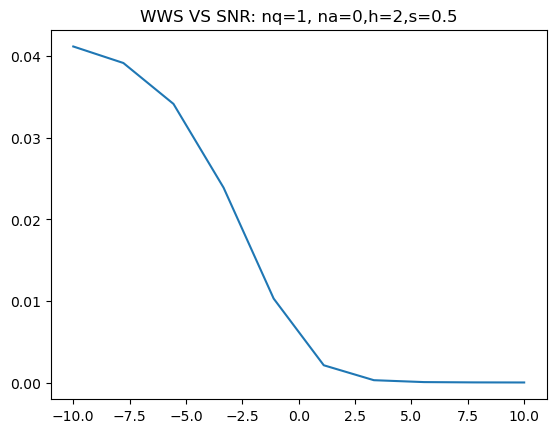

In [72]:
s= 0.5
h= 3
matrix1 = Matrix(1,1)

sigma_space_new = np.logspace(-1, 1, 10)
WWS1 = [WWS(sigma_space_new[i],matrix1,s,h) for i in range(len(sigma_space_new))]
plt.plot(10*np.log10(1/sigma_space_new), WWS1)
plt.title("WWS VS SNR: nq=1, na=0,h=2,s=0.5")